## Data Source
<a href='https://www.kaggle.com/datasets/kazanova/sentiment140'>Kaggle Twitter Sentiment Dataset</a>

## Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',names=['target','id','date','flag','user','text'])

In [3]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Data Visualization

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

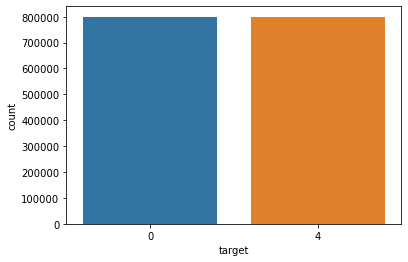

In [6]:
sns.countplot(x='target',data=df)

In [7]:
df = df.sample(frac=0.01)

<AxesSubplot:xlabel='target', ylabel='count'>

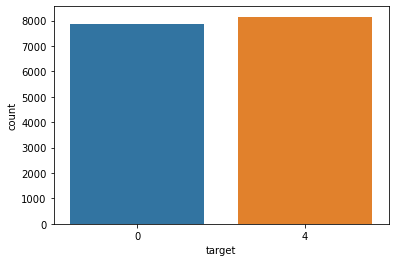

In [8]:
sns.countplot(x='target',data=df)

## Natural Language Processing

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [11]:
from nltk.corpus import stopwords

In [12]:
from string import punctuation

In [13]:
def text_process(tweet):
    words = tweet.split()
    no_mention = [w for w in words if '@' not in w]
    no_link = [w for w in no_mention if 'http' not in w]
    tokens = word_tokenize(' '.join(no_link))
    no_punc = [w for w in tokens if w not in punctuation]
    lemmer = WordNetLemmatizer()
    lemmed = [lemmer.lemmatize(w) for w in no_punc]
    no_stop = [w for w in lemmed if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in no_stop]
    return stemmed

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'],test_size=0.3)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline([
    ('Bag of words',CountVectorizer(analyzer=text_process)),
    ('Classifier',MultinomialNB())
])

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Bag of words',
                 CountVectorizer(analyzer=<function text_process at 0x000001D582A33670>)),
                ('Classifier', MultinomialNB())])

In [21]:
predictions = pipe.predict(X_test)

## Model Evaluation

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,predictions))

[[1767  553]
 [ 738 1742]]


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2320
           4       0.76      0.70      0.73      2480

    accuracy                           0.73      4800
   macro avg       0.73      0.73      0.73      4800
weighted avg       0.73      0.73      0.73      4800

